# Life expectancy and GDP

In this project, I will analyze the relationship between GDP and life expectancy across 6 countries (Chile, China, Germany, Mexico, United States of America and Zimbabwe) over 15 years (from 2000 to 2015).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('all_data.csv')
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [5]:
print(data.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


In [6]:
print(data.isnull().sum())

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


In [7]:
print(data['Country'].unique())
print(data['Year'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [8]:
data.groupby('Country').agg({"Life expectancy at birth (years)": ['min', 'max', 'mean'],
                            'GDP': ['min', 'max', 'mean']})

Life expectancy at birth (years)                  \
                                                      min   max      mean   
Country                                                                     
Chile                                                77.3  80.5  78.94375   
China                                                71.7  76.1  74.26250   
Germany                                              78.0  81.0  79.65625   
Mexico                                               74.8  76.7  75.71875   
United States of America                             76.8  79.3  78.06250   
Zimbabwe                                             44.3  60.7  50.09375   

                                   GDP                              
                                   min           max          mean  
Country                                                             
Chile                     6.973681e+10  2.783840e+11  1.697888e+11  
China                     1.211350e+12  1.106470e+13  4.957714e+12  
Germany                   1.949950e+12  3.890610e+12  3.094776e+12  
Mexico                    6.836480e+11  1.298460e+12  9.766506e+11  
United States of America  1.030000e+13  1.810000e+13  1.407500e+13  
Zimbabwe                  4.415703e+09  1.630467e+10  9.062580e+09

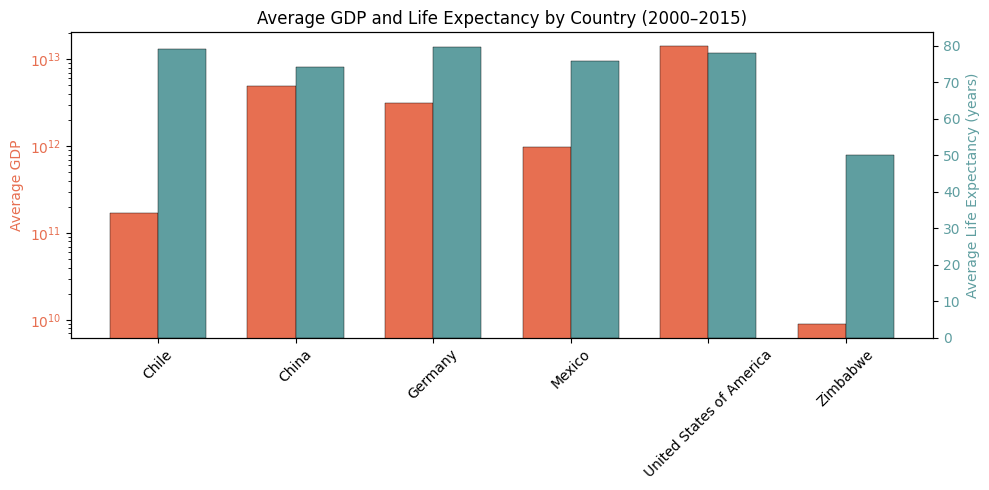

In [34]:
summary = data.groupby('Country').agg({'GDP':'mean', 'Life expectancy at birth (years)':'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10,5))

bar_width = 0.35
x = range(len(summary))

ax1.bar(x, summary['GDP'], width=bar_width, color='#E76F51', edgecolor='black', linewidth=0.3, label='Average GDP')
ax1.set_ylabel('Average GDP', color='#E76F51')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor='#E76F51')

ax2 = ax1.twinx()
ax2.bar([i + bar_width for i in x], summary['Life expectancy at birth (years)'], width=bar_width, color='#5F9EA0', edgecolor='black', linewidth=0.3, label='Average Life Expectancy')
ax2.set_ylabel('Average Life Expectancy (years)', color='#5F9EA0')
ax2.tick_params(axis='y', labelcolor='#5F9EA0')

ax1.set_xticks([i + bar_width/2 for i in x])
ax1.set_xticklabels(summary['Country'], rotation=45)
plt.title('Average GDP and Life Expectancy by Country (2000–2015)')
plt.tight_layout()
plt.savefig("avg_gdp_life_exp.png", dpi=300, bbox_inches="tight")
plt.show()


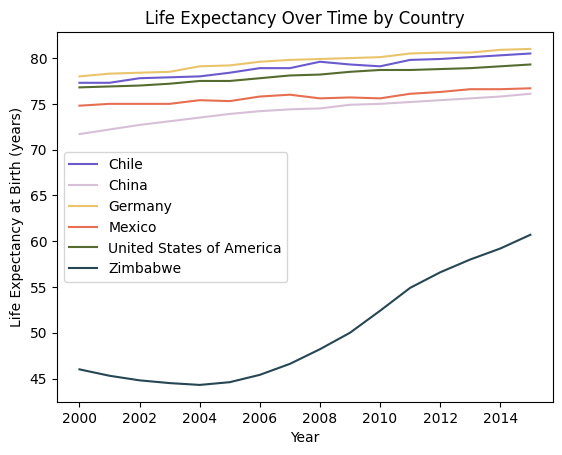

In [15]:
colors = {
    "Chile": "#6A5ACD",
    "China": "#D8BFD8",
    "Germany": "#E9C46A",
    "Mexico": "#E76F51",
    "United States of America": "#556B2F",
    "Zimbabwe": "#264653"
}

for country in data['Country'].unique():
    subset = data[data['Country'] == country]
    plt.plot(subset['Year'], subset['Life expectancy at birth (years)'], 
                color=colors[country], label=country)

plt.xlabel("Year")
plt.ylabel("Life Expectancy at Birth (years)")
plt.title("Life Expectancy Over Time by Country")
plt.legend()
plt.savefig("life_expectancy.png", dpi=300, bbox_inches="tight")
plt.show()

### Life Expectancy Insights

- Germany, the USA, and China show a steady increase in life expectancy from 2000 to 2015.  
- Chile shows unstable improvement with some fluctuations.  
- Mexico shows moderate improvement over time.  
- Zimbabwe has lower life expectancy overall but shows gradual improvement. 

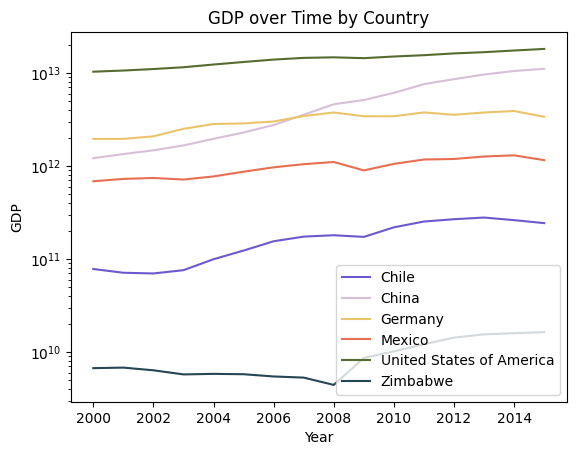

In [17]:
for country in data['Country'].unique():
    subset = data[data['Country'] == country]
    plt.plot(subset['Year'], subset['GDP'], 
                color=colors[country], linewidth=1.5, label=country)

plt.xlabel("Year")
plt.ylabel("GDP")
plt.yscale("log")
plt.title("GDP over Time by Country")
plt.legend()
plt.savefig("gdp.png", dpi=300, bbox_inches="tight")
plt.show()

### GDP Insights

- The USA and China show steady GDP growth, with China growing particularly rapidly.  
- Germany, Chile, and Mexico show moderate, steady growth, with a noticeable dip in 2009.  
- Zimbabwe had the lowest GDP, which decreased until 2008 and then increased significantly afterwards.

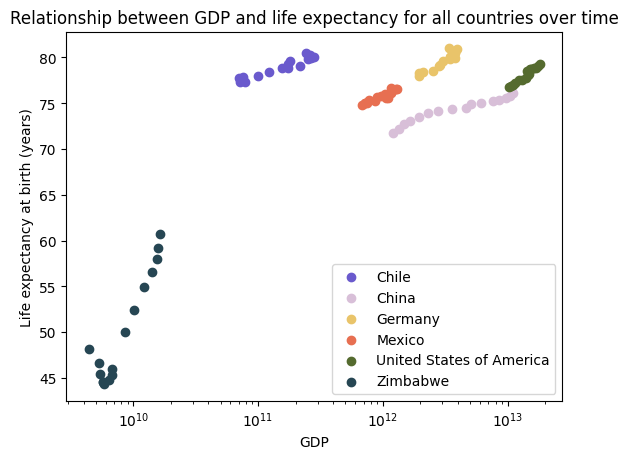

In [18]:
for country in data['Country'].unique():
    subset = data[data['Country'] == country]
    plt.scatter(x=subset['GDP'], y=subset['Life expectancy at birth (years)'], color=colors[country], label=country)
plt.xlabel("GDP")
plt.ylabel("Life expectancy at birth (years)")
plt.xscale("log")
plt.title("Relationship between GDP and life expectancy for all countries over time")
plt.legend()
plt.savefig("gdp_vs_life_expectancy.png", dpi=300, bbox_inches="tight")
plt.show()    

### GDP vs Life Expectancy Insights

- Most countries show a roughly linear relationship between GDP and life expectancy: as GDP increases, life expectancy also increases steadily.  
- Zimbabwe shows a dip in life expectancy in the middle years, despite fluctuations in GDP.  
- China shows a nonlinear pattern, with life expectancy rising faster after a certain GDP threshold, indicating accelerated improvement with economic growth.